# Tutorial on Meshing

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import os
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp

## Standard Meshing based on an Irregular Data Set

We construct a Meshing Standard based on a set of Data Points 

In [3]:
nech = 40
extendmin = [0,0]
extendmax = [150,100]
data = gl.Db.createFromBox(nech,extendmin, extendmax)
data


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 3
Maximum Number of UIDs       = 3
Total number of samples      = 40

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2

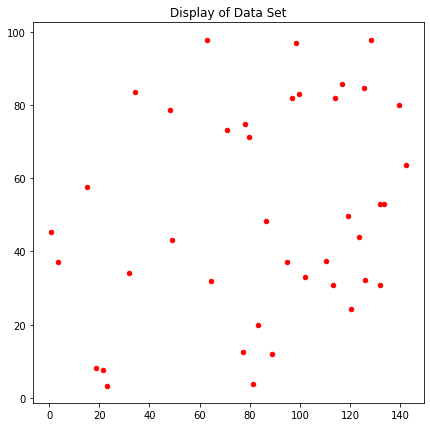

In [4]:
ax = gp.point(data,figsize=[7,7],title="Display of Data Set")

Creating the Meshing

In [5]:
mesh1 = gl.MeshEStandardExt()
err = mesh1.resetFromDb(data)
mesh1.display()


Standard Meshing
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 128
Number of Apices          = 79

Bounding Box Extension
----------------------
Dim #1 - Min:0.648392 - Max:142.336
Dim #2 - Min:3.38503 - Max:97.8622
 

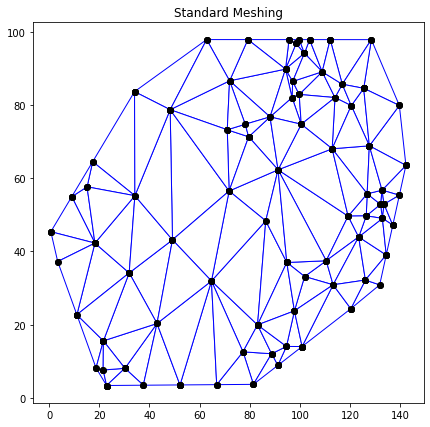

In [6]:
ax = gp.mesh(mesh1,figsize=[7,7],flagApex=True,title="Standard Meshing")

Improving the meshing in order to avoid hugly triangles

In [7]:
mesh2 = gl.MeshEStandardExt()
err = mesh2.resetFromDb(data,None,triswitch="nqQ")
mesh2.display()


Standard Meshing
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 128
Number of Apices          = 79

Bounding Box Extension
----------------------
Dim #1 - Min:0.648392 - Max:142.336
Dim #2 - Min:3.38503 - Max:97.8622
 

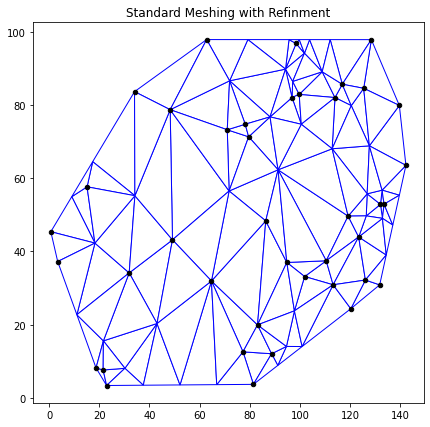

In [8]:
ax = gp.mesh(mesh2,figsize=[7,7],title="Standard Meshing with Refinment")
ax = gp.point(data,color="black",ax=ax)

## Turbo Meshing

Instead we can use Turbo Meshing to cover an area, without specifically honoring each datum

In [9]:
mesh3 = gl.MeshETurbo()
err = mesh3.initFromExtend(extendmin, extendmax, [5,5])
mesh3.display()


Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      5.000     5.000
Number :         31        21
 
Turbo Meshing
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 1200
Number of Apices          = 651

Bounding Box Extension
----------------------
Dim #1 - Min:0 - Max:150
Dim #2 - Min:0 - Max:100
 

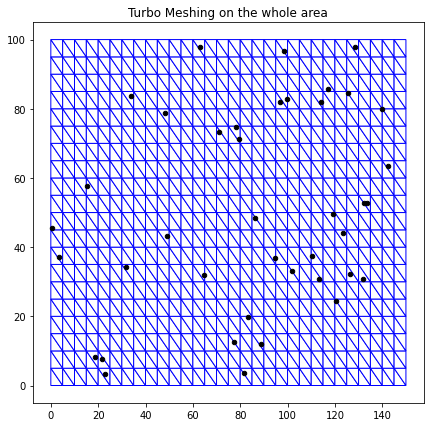

In [10]:
ax = gp.mesh(mesh3,figsize=[7,7],title="Turbo Meshing on the whole area")
ax = gp.point(data,color="black",ax=ax)

We can create a regular grid covering the same area (based on the data set)

In [11]:
grid = gl.DbGrid()
err = grid.resetCoveringDb(data, [50,50])

Define a Polygon as the Convex hull of the data

In [12]:
polygon = gl.Polygons()
err = polygon.resetFromDb(data)

Use the Polygon to mask off some nodes of the regular grid, located too far from the data

In [13]:
err = gl.db_polygon(grid, polygon)

We create a Turbo Meshing from the grid (which contains a selection)

In [14]:
mesh4 = gl.MeshETurbo(grid)
mesh4.display()


Grid characteristics:
---------------------
Origin :      0.648     3.385
Mesh   :      2.892     1.928
Number :         50        50
 
Turbo Meshing
Diamond construction is activated
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 3493
Number of Apices          = 1830

Bounding Box Extension
----------------------
Dim #1 - Min:0.648392 - Max:142.336
Dim #2 - Min:3.38503 - Max:97.8622
 

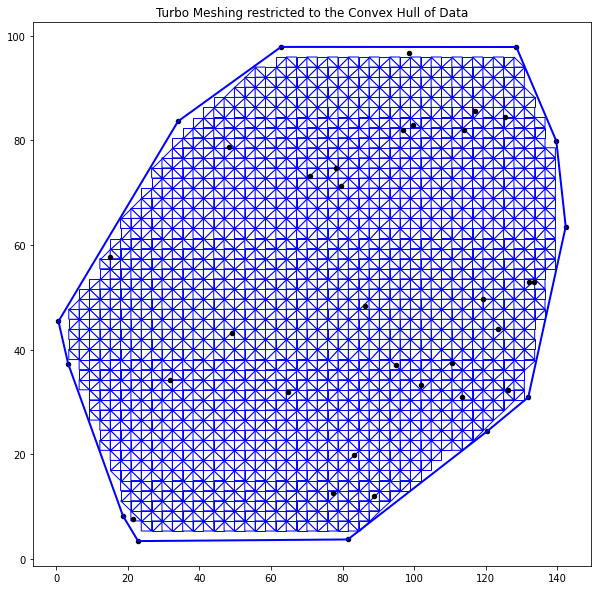

In [15]:
ax = gp.mesh(mesh4,figsize=[10,10],title="Turbo Meshing restricted to the Convex Hull of Data")
ax = gp.point(data,color="black",ax=ax)
ax = gp.polygon(polygon, ax=ax)

## Read and Write in Neutral File

Testing the read and write into a Neutral File (with masked meshes)

In [16]:
gl.ASerializable.setContainerName(True)
gl.ASerializable.setPrefixName("Tuto-Meshing")

err = mesh4.dumpToNF("Mesh_masked")
mesh5 = gl.MeshETurbo.createFromNF("Mesh_masked")
mesh5.display()


Grid characteristics:
---------------------
Origin :      0.648     3.385
Mesh   :      2.892     1.928
Number :         50        50
 
Turbo Meshing
Diamond construction is activated
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 4802
Number of Apices          = 2500

Bounding Box Extension
----------------------
Dim #1 - Min:0.648392 - Max:142.336
Dim #2 - Min:3.38503 - Max:97.8624
 

In [17]:
mesh5.display()


Grid characteristics:
---------------------
Origin :      0.648     3.385
Mesh   :      2.892     1.928
Number :         50        50
 
Turbo Meshing
Diamond construction is activated
Euclidean Geometry
Space Dimension           = 2
Number of Apices per Mesh = 3
Number of Meshes          = 4802
Number of Apices          = 2500

Bounding Box Extension
----------------------
Dim #1 - Min:0.648392 - Max:142.336
Dim #2 - Min:3.38503 - Max:97.8624
 

## Turbo Meshing on Rotated Grid

In [ ]:
grid = gl.DbGrid.create(nx=[6,4], dx=[1.,5.], x0=[10.,20.], angles=[-80.,0.])
grid.display()
ax = gp.point(grid,color="black", aspect=1, figsize=[8,8])

In [ ]:
model = gl.Model.createFromParam(gl.ECov.CUBIC,ranges=[10.,5.], angles=[30.,0.])
model.display()

In [ ]:
mesh6 = gl.MeshETurbo()
mesh6.initFromCova(model.getCova(0),grid,ratio=10,nbExt=2,useSel=True)
mesh6.display()

In [ ]:
ax = gp.mesh(mesh6, aspect=1, figsize=[8,8],
              title="Turbo Meshing for Rotated Grid")
ax = gp.point(grid,color="black", ax=ax)
